# Linear Regression

In this notebook we will use TensorFlow to compute a linear regression
In the following code cell we will explore all the mathematical Tensorflow functions that we will
need for Linear regression. 

In [18]:
%matplotlib inline
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

/Users/Christopher_old/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [19]:
# just some placeholders # 
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
c = tf.placeholder(tf.float32, shape=[2, 2], name="c")

# the matimatical functions # 
a_plus_b = tf.add(a, b)
a_times_b = tf.mul(a, b)
square_a =tf.square(a)
mean_keep_dim = tf.reduce_mean(c, keep_dims=True)
mean = tf.reduce_mean(c, keep_dims=False)
mean_axis = tf.reduce_mean(c, keep_dims=False, reduction_indices=0)
mean_axis_keep_dim = tf.reduce_mean(c, keep_dims=True, reduction_indices=0)
mean_axis_keep_dim_2 = tf.reduce_mean(c, keep_dims=True, reduction_indices=1)

# excecute the the graphs # 
sess = tf.Session()
print 'a_plus_b', sess.run(a_plus_b, feed_dict={a: 2.0, b: 3.0})
print 'a_times_b',sess.run(a_times_b, feed_dict={a: 2.0, b: 3.0})
print 'square_a', sess.run(square_a, feed_dict={a:2.0})
print 'mean',  sess.run(mean, feed_dict={c:np.ones((2,2))})
print 'mean_keep_dim',  sess.run(mean_keep_dim, feed_dict={c:np.ones((2,2))})
print 'mean_axis',  sess.run(mean_axis, feed_dict={c:np.ones((2,2))})
print 'mean_axis_keep_dim',  sess.run(mean_axis_keep_dim, feed_dict={c:np.ones((2,2))})
print 'mean_axis_keep_dim_2', sess.run(mean_axis_keep_dim_2, feed_dict={c:np.ones((2,2))})
sess.close()

a_plus_b 5.0
a_times_b 6.0
square_a 4.0
mean 1.0
mean_keep_dim [[ 1.]]
mean_axis [ 1.  1.]
mean_axis_keep_dim [[ 1.  1.]]
mean_axis_keep_dim_2 [[ 1.]
 [ 1.]]


Make some fake data to perform linear regression on.  

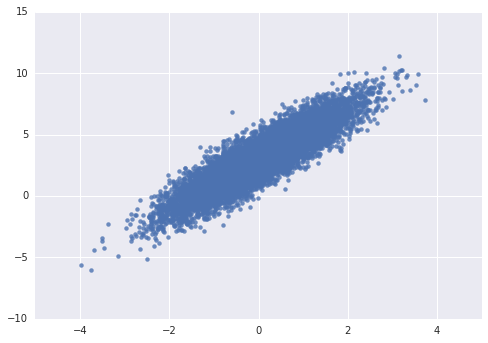

In [31]:
x = np.random.normal(0.0, 1.0, 10000)
bias = 3.0
slope = 2.0
y = bias + slope * (x + np.random.normal(0.0, 0.5, 10000))  
sns.regplot(x, y, fit_reg=False)

In [21]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

In [22]:
W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')
Y_pred = tf.add(tf.mul(X, W), b)

The cost function we want to minimize, mean squared error. 

In [23]:
cost = tf.reduce_mean(tf.square(Y_pred - Y))

In [24]:
# use gradien deceent to find the optimal values for W and b 
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [25]:
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

In [26]:
NEPOCH = 300
for i in range(NEPOCH):
    sess.run(optimizer, feed_dict={X: x, Y: y})
print sess.run(W), sess.run(b)
print slope, bias 

[ 1.98877788] [ 2.97838664]
2.0 3.0
